# Projeto Final IQFC
***
### Referência para Projeto Final
***

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import quantstats as qs

## Tratamento das bases de dados

In [2]:
fechamento=pd.read_csv('dbs/fechamento.csv', delimiter=';')
fechamento.columns=fechamento.columns.str.replace('Fechamento\najust p/ prov\nEm moeda orig\n','',regex = False)
fechamento.columns=fechamento.columns.str.strip()
fechamento.Data=pd.to_datetime(fechamento.Data,dayfirst=True)
fechamento=fechamento.melt(id_vars='Data')
fechamento.value=fechamento.value.replace('-',np.nan)
fechamento.value = fechamento.value.str.replace('.','')
fechamento.value = fechamento.value.str.replace(',','.')
fechamento.value = pd.to_numeric(fechamento.value)
fechamento = pd.pivot_table(fechamento, values = 'value', index = 'Data', columns = 'variable')
fechamento=fechamento.reset_index()

In [3]:
roic=pd.read_csv('dbs/roic.csv',delimiter=';')
roic.columns=roic.columns.str.replace('ROIC (IC fim) %\n de 12 meses\n consolid:sim*\n','',regex = False)
roic.columns=roic.columns.str.strip()
roic.Data=pd.to_datetime(roic.Data,dayfirst=True)
roic=roic.melt(id_vars='Data')
roic.value=roic.value.replace('-',np.nan)
roic.value = roic.value.str.replace('.','')
roic.value = roic.value.str.replace(',','.')
roic.value = pd.to_numeric(roic.value)
roic = pd.pivot_table(roic, values = 'value', index = 'Data', columns = 'variable')
roic=roic.reset_index()

In [4]:
ineg = pd.read_csv('dbs/INEGCSV.csv',delimiter = ';')
ineg.columns = ineg.columns.str.replace('Negociabilidade\n1 dias\nEm moeda orig\n','',regex = False)
ineg.columns = ineg.columns.str.strip()
ineg.Data = pd.to_datetime(ineg.Data, dayfirst = True)
ineg = ineg.melt(id_vars = 'Data')
ineg.value = ineg.value.replace('-', np.nan)
ineg.value = ineg.value.str.replace('.','')
ineg.value = ineg.value.str.replace(',','.')
ineg.value = pd.to_numeric(ineg.value)
ineg = pd.pivot_table(ineg, values = 'value', index = 'Data', columns = 'variable')
ineg = ineg.reset_index()

## Parâmetros Iniciais

In [5]:
di = pd.Timestamp(dt.date(2015,1,1))
df = fechamento.Data.iloc[-1]
lookback_ineg = 1
lookback_momentum = 1
lookback_roic = 3
rebal = 3
ineg_total = 100

## Funções para aplicação de Fatores

In [6]:
def Roic(roic, di, lookback, ibx):
    data_analise_roic = di - pd.DateOffset(months = lookback)
    base_roic = roic[(roic['Data'] < di) & (roic['Data'] >= data_analise_roic)]
    base_roic = base_roic.melt(id_vars = 'Data')
    base_roic = base_roic[base_roic['variable'].isin(ibx)]
    base_roic = base_roic.pivot_table(index = 'Data', values = 'value', columns = 'variable')
    base_roic = base_roic.max()
    base_roic = base_roic.reset_index()
    base_roic = base_roic.sort_values(by = base_roic.columns[1], ascending = False)
    book_roic_high = base_roic[:int(len(base_roic) * 0.2)].variable
    book_roic_low = base_roic[-int(len(base_roic) * 0.2):].variable
    return book_roic_high, book_roic_low


## Backtest

Max Drawdown
Winners    -49.827029
Universo   -50.463764
Losers     -51.089753
dtype: float64
Sharpe
Winners     0.76
Universo    0.48
Losers      0.41
dtype: float64
Sortino
Winners     1.03
Universo    0.65
Losers      0.56
dtype: float64
Desvio Padrão
Winners     0.016
Universo    0.016
Losers      0.017
dtype: float64


c:\Users\cailu\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\cailu\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\cailu\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the 

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2015-01-05   2015-01-05
End Period                 2023-04-17   2023-04-17
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          107.04%      259.87%
CAGR﹪                     6.25%        11.26%

Sharpe                     0.48         0.76
Prob. Sharpe Ratio         90.86%       98.05%
Smart Sharpe               0.46         0.72
Sortino                    0.65         1.03
Smart Sortino              0.62         0.98
Sortino/√2                 0.46         0.73
Smart Sortino/√2           0.44         0.69
Omega                      1.15         1.15

Max Drawdown               -50.46%      -49.83%
Longest DD Days            679          683
Volatility (ann.)          26.16%       25.48%
R^2                        0.82         0.82
Information Ratio          0.04         0.04
Calmar            

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-02-20,2020-03-18,2021-02-10,357,-49.827029,-46.146200
2,2021-06-04,2021-12-01,2023-04-17,683,-24.195385,-23.094269
3,2018-01-29,2018-06-18,2019-01-17,354,-21.998795,-21.057576
4,2015-05-08,2016-01-21,2016-06-20,410,-21.500037,-20.620596
5,2016-10-25,2016-12-14,2017-01-24,92,-12.066634,-11.903515


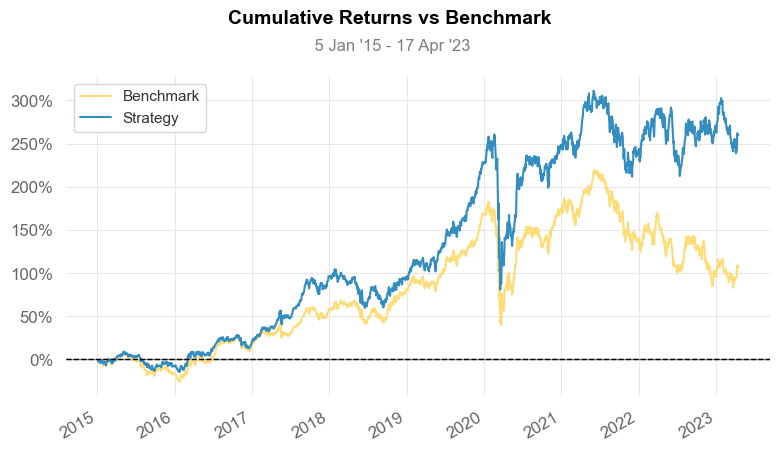

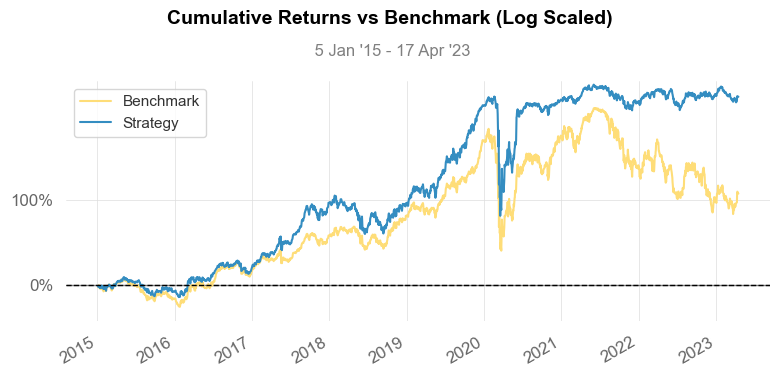

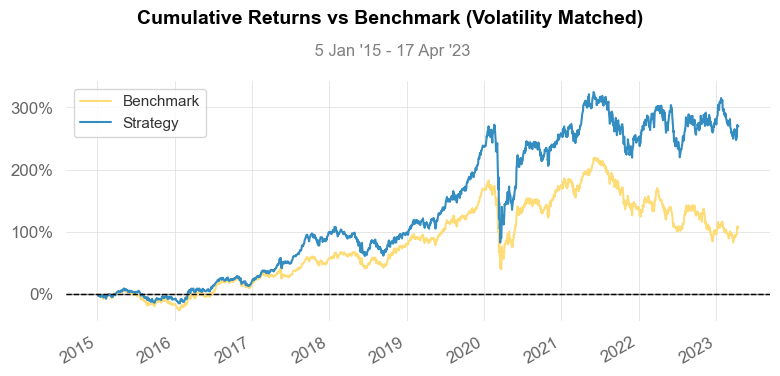

c:\Users\cailu\AppData\Local\Programs\Python\Python312\Lib\site-packages\quantstats\_plotting\wrappers.py:555: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  .resample("A")
c:\Users\cailu\AppData\Local\Programs\Python\Python312\Lib\site-packages\quantstats\_plotting\wrappers.py:557: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  .resample("A")
c:\Users\cailu\AppData\Local\Programs\Python\Python312\Lib\site-packages\quantstats\_plotting\wrappers.py:565: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  returns = returns.resample("A").apply(_stats.comp)
c:\Users\cailu\AppData\Local\Programs\Python\Python312\Lib\site-packages\quantstats\_plotting\wrappers.py:568: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  returns = returns.resample("A").last()


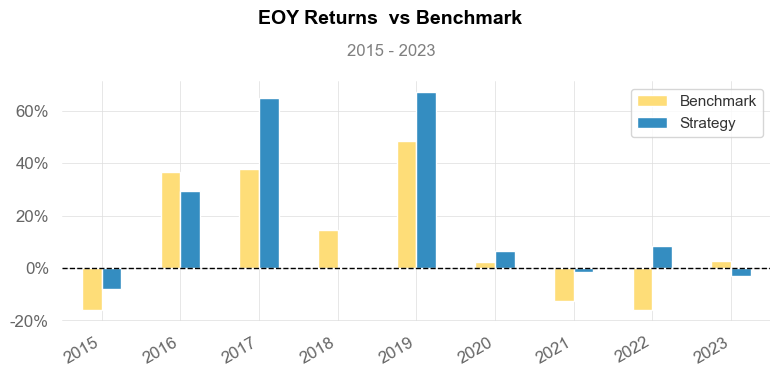

c:\Users\cailu\AppData\Local\Programs\Python\Python312\Lib\site-packages\quantstats\_plotting\core.py:433: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample(resample)
c:\Users\cailu\AppData\Local\Programs\Python\Python312\Lib\site-packages\quantstats\_plotting\core.py:435: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample(resample)
c:\Users\cailu\AppData\Local\Programs\Python\Python312\Lib\site-packages\quantstats\_plotting\core.py:440: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  returns.fillna(0).resample(resample).apply(apply_fnc).resample(resample).last()


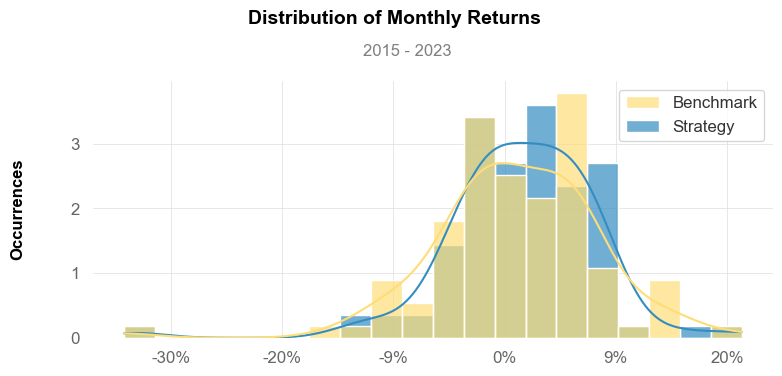

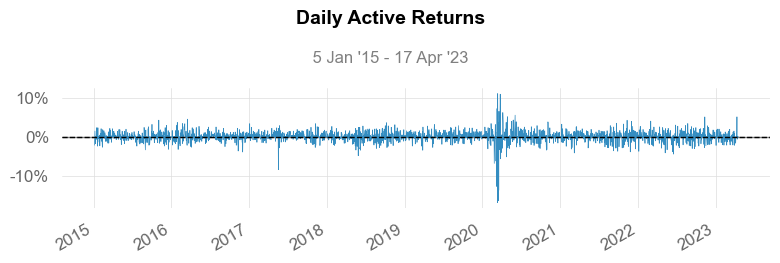

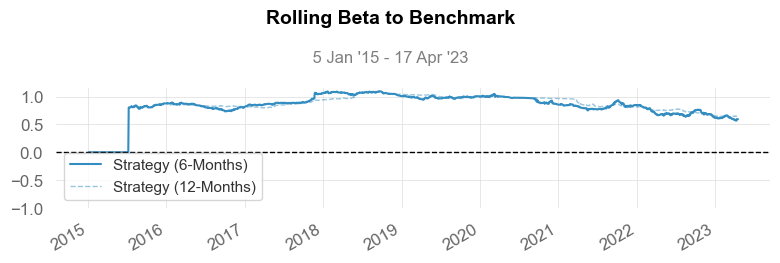

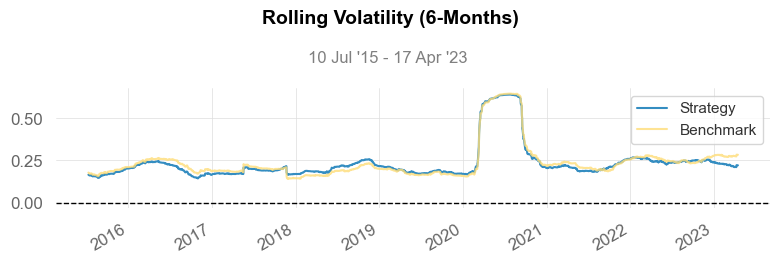

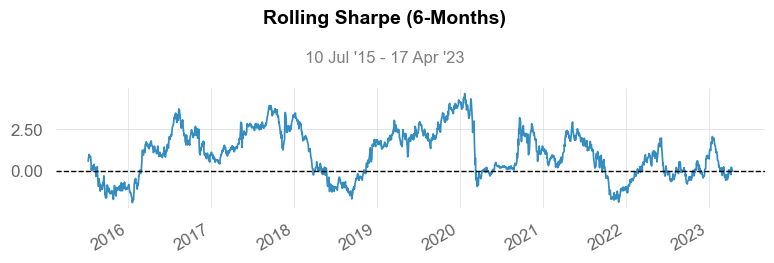

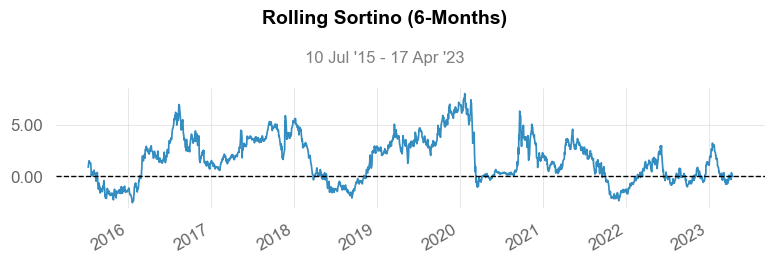

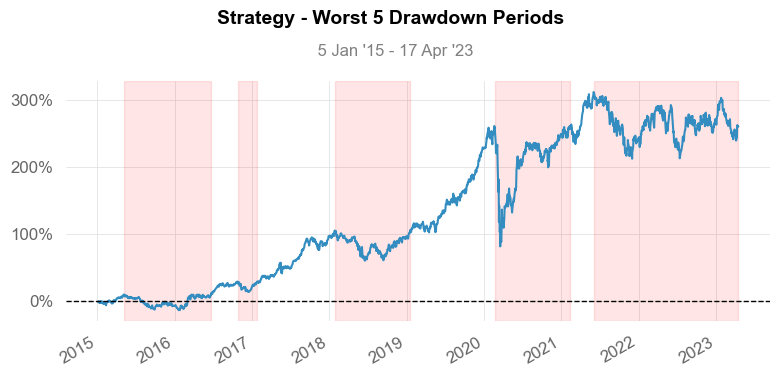

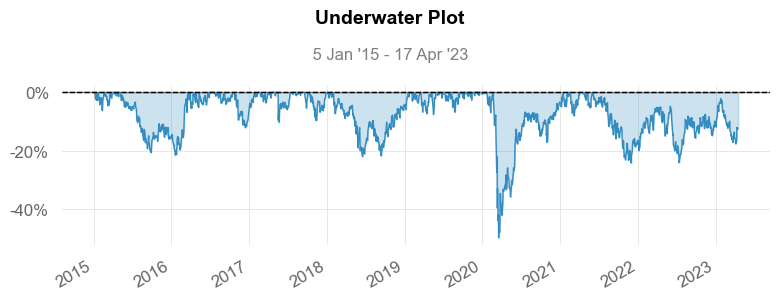

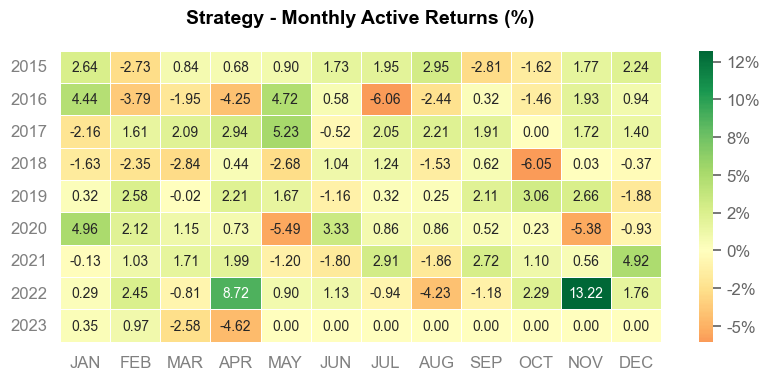

c:\Users\cailu\AppData\Local\Programs\Python\Python312\Lib\site-packages\quantstats\_plotting\core.py:1016: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  port["Weekly"].ffill(inplace=True)
c:\Users\cailu\AppData\Local\Programs\Python\Python312\Lib\site-packages\quantstats\_plotting\core.py:1018: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  port["Monthly"] = port["Daily"].resample("M").apply(apply_fnc)
c:\Users\cailu\AppData\Local\Programs\Python\Python312\Lib\site-package

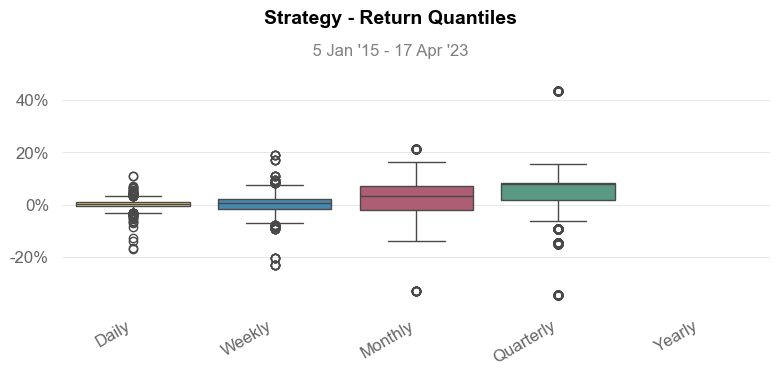

In [7]:
rebalanceamento = di
retorno = pd.DataFrame()

while rebalanceamento <= df:
    
    rebalanceamento = di + pd.DateOffset(months = rebal)

    data_analise_ineg = di - pd.DateOffset(months = lookback_ineg)

    try:
        base_ineg = ineg[(ineg['Data'] < di) & (ineg['Data'] > data_analise_ineg)]
        base_ineg = base_ineg.set_index('Data')
        base_ineg = base_ineg.iloc[-1]
        base_ineg = base_ineg.reset_index()
        base_ineg = base_ineg.sort_values(by = base_ineg.columns[1], ascending = False)
        ibx = list(base_ineg.variable[:ineg_total])
    except:
        None
        
    roic_high, roic_low = Roic(roic, di, lookback_roic, ibx)

    #Possibilidades de combinação de estratégias
    book = list(roic_high)
    
    book_losers = []
    for acao in ibx:
        if acao not in book:
            book_losers.append(acao)
    
    backtest_ibx = fechamento[(fechamento['Data'] >= di) & (fechamento['Data'] < rebalanceamento)]
    backtest_ibx = backtest_ibx.melt(id_vars = 'Data')
    backtest_ibx = backtest_ibx[backtest_ibx['variable'].isin(ibx)]
    backtest_ibx = backtest_ibx.pivot_table(index = 'Data', columns = 'variable', values = 'value')
    backtest_ibx = backtest_ibx.pct_change(fill_method=None)
    backtest_ibx = backtest_ibx.replace(np.nan,0)
    backtest_ibx['Retorno'] = backtest_ibx.mean(axis = 1)
    backtest_ibx_ret = backtest_ibx.Retorno[1:]
    
    backtest_losers = fechamento[(fechamento['Data'] >= di) & (fechamento['Data'] < rebalanceamento)]
    backtest_losers = backtest_losers.melt(id_vars = 'Data')
    backtest_losers = backtest_losers[backtest_losers['variable'].isin(book_losers)]
    backtest_losers = backtest_losers.pivot_table(index = 'Data', columns = 'variable', values = 'value')
    backtest_losers = backtest_losers.pct_change(fill_method=None)
    backtest_losers = backtest_losers.replace(np.nan,0)
    backtest_losers['Retorno'] = backtest_losers.mean(axis = 1)
    backtest_losers_ret = backtest_losers.Retorno[1:]
    
    backtest_winners = fechamento[(fechamento['Data'] >= di) & (fechamento['Data'] < rebalanceamento)]
    backtest_winners = backtest_winners.melt(id_vars = 'Data')
    backtest_winners = backtest_winners[backtest_winners['variable'].isin(book)]
    backtest_winners = backtest_winners.pivot_table(index = 'Data', columns = 'variable', values = 'value')
    backtest_winners = backtest_winners.pct_change(fill_method=None)
    backtest_winners = backtest_winners.replace(np.nan,0)
    backtest_winners['Retorno'] = backtest_winners.mean(axis = 1)
    backtest_winners_ret = backtest_winners.Retorno[1:]

    retorno_rebal = pd.DataFrame({'Winners' : backtest_winners_ret,
                                    'Universo' : backtest_ibx_ret,
                                    'Losers' : backtest_losers_ret})

    retorno = retorno._append(retorno_rebal)
    
    di = di + pd.DateOffset(months = rebal)

cota = retorno.add(1).cumprod()
dp = np.std(retorno, axis=0)
sortino = qs.stats.sortino(retorno, 0)
sharpe = qs.stats.sharpe(retorno, 0)
maxdd = qs.stats.max_drawdown(retorno)

print("Max Drawdown")
print(maxdd * 100)
print("Sharpe")
print(sharpe.round(2))
print("Sortino")
print(sortino.round(2))
print("Desvio Padrão")
print(dp.round(3))

qs.reports.full(retorno["Winners"], retorno["Universo"])